In [1]:
from src.data_loader import UCF101_Dataset_Loader
from src.training import DEVICE, Mixed_Precision_Single_Core_Trainer
from src.model_architectures import AlexNet3D
from src.utils import plot_metrics

import torch
import numpy as np

from tqdm import tqdm

In [2]:
ucf_data_dir = "data/Human_Mask_Full_data/"
ucf_label_dir = "data/ucfTrainTestlist/"
frames_per_clip = 16
step_between_clips = 1

height = 112
width = 112

batch_size = 256

In [3]:
ucf101 = UCF101_Dataset_Loader(ucf_data_dir, ucf_label_dir, frames_per_clip, step_between_clips, height, width, batch_size)

Loading Training Data .........


100%|██████████| 85/85 [00:01<00:00, 43.70it/s]


Loading Testing Data .........


100%|██████████| 85/85 [00:01<00:00, 57.24it/s]



Total number of train samples: 6633
Total number of test samples: 2532
Total number of (train) batches: 26
Total number of (test) batches: 10


Total Number of Classes: 10


#### Model Training

In [4]:
torch.manual_seed(69)
alex_net_model = AlexNet3D((frames_per_clip, height, width), len(ucf101.classes)).to(device=DEVICE)
alex_net_model

AlexNet3D(
  (max_pool): MaxPool3d(kernel_size=3, stride=2, padding=(1, 1, 1), dilation=1, ceil_mode=False)
  (conv1): Conv3d(3, 96, kernel_size=(5, 5, 5), stride=(2, 2, 2), padding=(3, 0, 0))
  (conv2): Conv3d(96, 256, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(3, 2, 2))
  (conv3): Conv3d(256, 384, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv4): Conv3d(384, 384, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv5): Conv3d(384, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (linear1): Linear(in_features=100352, out_features=4096, bias=True)
  (linear2): Linear(in_features=4096, out_features=4096, bias=True)
  (linear3): Linear(in_features=4096, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=1)
)

In [5]:
EPOCHS = 10
optimizer = torch.optim.Adam(alex_net_model.parameters(), lr=4e-5)
mp_trainer = Mixed_Precision_Single_Core_Trainer(len(ucf101.classes))

In [6]:
output_metrics = mp_trainer.training_loop(alex_net_model,ucf101.train_loader,ucf101.test_loader,EPOCHS, optimizer)

100%|██████████| 10/10 [03:17<00:00, 19.74s/it]


For Epoch 1 We Train Loss:2.194712684704707, Test Loss:2.2587350368499757, Train Accuracy:0.18628052364175135, Test Accuracy:0.1726614087820053


100%|██████████| 10/10 [04:01<00:00, 24.14s/it]


For Epoch 2 We Train Loss:2.060527673134437, Test Loss:2.2217131853103638, Train Accuracy:0.29907954656160796, Test Accuracy:0.19791111648082732


100%|██████████| 10/10 [03:56<00:00, 23.65s/it]


For Epoch 3 We Train Loss:2.000030416708726, Test Loss:2.183588743209839, Train Accuracy:0.3833655921312479, Test Accuracy:0.2595170199871063


100%|██████████| 10/10 [02:53<00:00, 17.35s/it]


For Epoch 4 We Train Loss:2.0606475059802714, Test Loss:2.2295569896698, Train Accuracy:0.3078757020143362, Test Accuracy:0.19442157596349716


100%|██████████| 10/10 [02:52<00:00, 17.25s/it]


For Epoch 5 We Train Loss:1.990753031693972, Test Loss:2.1832988262176514, Train Accuracy:0.39098855279959166, Test Accuracy:0.25103009939193727


100%|██████████| 10/10 [02:49<00:00, 17.00s/it]


For Epoch 6 We Train Loss:1.9855258327264051, Test Loss:2.220864176750183, Train Accuracy:0.3959203912661626, Test Accuracy:0.20000000298023224


100%|██████████| 10/10 [02:45<00:00, 16.60s/it]


For Epoch 7 We Train Loss:1.9856315163465648, Test Loss:2.145086932182312, Train Accuracy:0.3953411602056943, Test Accuracy:0.30000001192092896


100%|██████████| 10/10 [02:52<00:00, 17.30s/it]


For Epoch 8 We Train Loss:1.9830327079846308, Test Loss:2.1592178106307984, Train Accuracy:0.3968737411957521, Test Accuracy:0.30000001192092896


100%|██████████| 10/10 [02:54<00:00, 17.43s/it]


For Epoch 9 We Train Loss:1.979858976144057, Test Loss:2.152598476409912, Train Accuracy:0.3971015042983569, Test Accuracy:0.30000001192092896


100%|██████████| 10/10 [02:49<00:00, 16.98s/it]

For Epoch 10 We Train Loss:1.9765632427655733, Test Loss:2.1702473163604736, Train Accuracy:0.397794634103775, Test Accuracy:0.2588749319314957


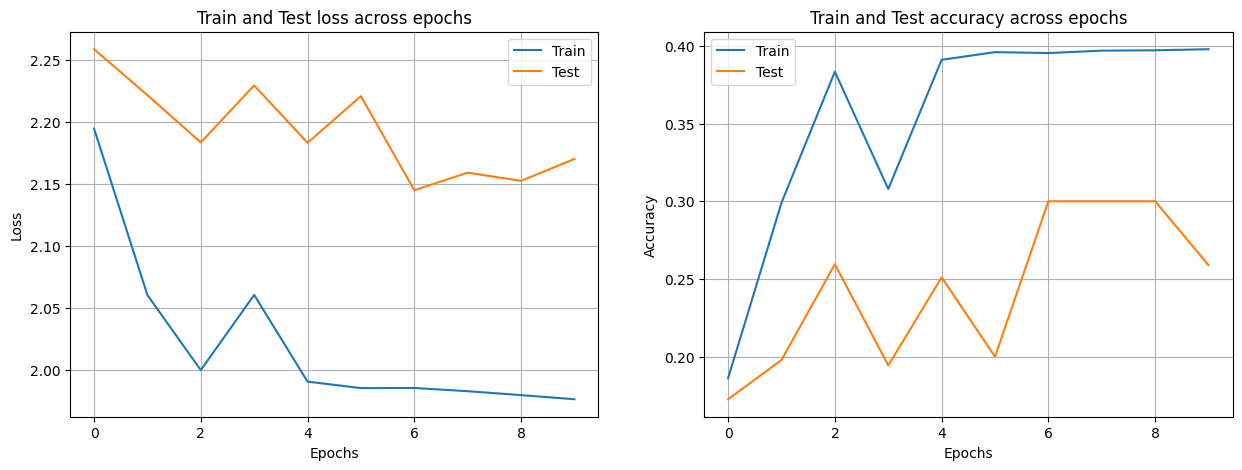

In [7]:
plot_metrics(EPOCHS, output_metrics)

In [8]:
torch.save(alex_net_model.state_dict(), 'models/alex_net_human_mask_data.pth')